# Inicializações

In [5]:
url = "http://vps-40d69db1.vps.ovh.ca:21446/api/CotacaoIntradayAcaoResultadoValors/obtemPorRegraData?idRegra=1&diaNum=20210101"

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Execuções

Data :  08/01/2022 12:31:11
Total:  211268
Ticker:  73


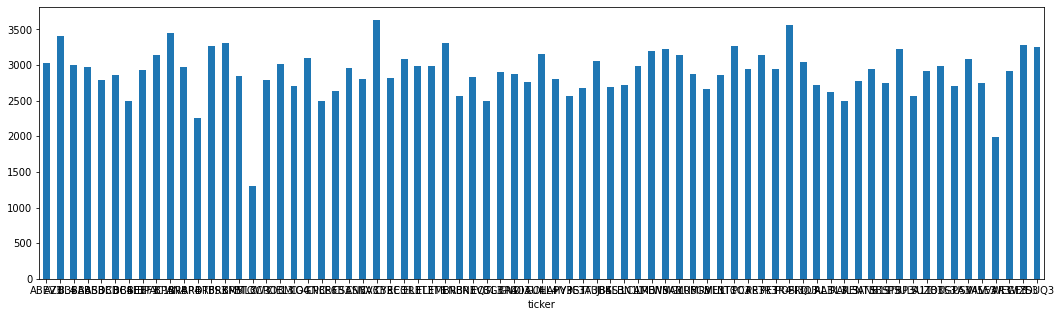

   ticker  total
0   ABEV3   3034
1   AZUL4   3414
2   B3SA3   3000
3   BBAS3   2974
4   BBDC3   2793
..    ...    ...
68  VALE3   2744
69  VVAR3   1990
70  WEGE3   2918
71  WIZS3   3286
72  YDUQ3   3256

[73 rows x 2 columns]


In [7]:
r = requests.get(url)
j = r.json()
df = pd.DataFrame.from_dict(j)
dfTicker = df.groupby(['ticker']).agg('qtde').sum().reset_index(name ='total')

now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")

print('Data : ' , dt_string)
print('Total: ' , df.agg('qtde').sum())
print('Ticker: ' , len(dfTicker))


dfTicker.plot.bar(x='ticker', y='total', rot=0, figsize=(18,5), legend=None)
plt.show()

print(dfTicker)

# Percentual por Ticker

In [4]:
agrupado_por_ticker = df.groupby(['ticker', 'resultado']).agg({'qtde': 'sum'})
ticker = df.groupby(['ticker']).agg({'qtde': 'sum'})
agrupado_por_ticker.div(ticker, level='ticker') * 100

qtde
ticker resultado           
ABEV3  -1         12.792671
        0         55.412284
        1         31.795046
AZUL4  -1         54.155334
        0         12.330009
...                     ...
WIZS3  -1         60.450062
        1         39.549938
YDUQ3  -1         62.500000
        0          6.978908
        1         30.521092

[216 rows x 1 columns]